### First we will import all our data sctructure and visualization tools

In [1]:
from torchvision.models import densenet121

In [2]:
import torch.nn as nn
model = densenet121()
model.features[0] = nn.Conv2d(64, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.classifier = nn.Sequential(
    nn.Linear(in_features=1024, out_features=1000),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=1000, out_features=512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=512, out_features=256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=256, out_features=3),
)
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(64, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [3]:
import sys; sys.path.insert(0, "..") 
import os
import random
import src.visualization.utils as vis
from src.dataset.dataset import Data 
from src.dataset.utils import balanced_active_learning_split

### Lets load our data

In [4]:
dataset = Data(data_path="../data/NPY/volumes/",target_path="../data/NPY/labels/")
print("dataset length: {}".format(len(dataset)))
_ = balanced_active_learning_split(dataset)

dataset length: 3186


### Lets plot some slices from a random volume

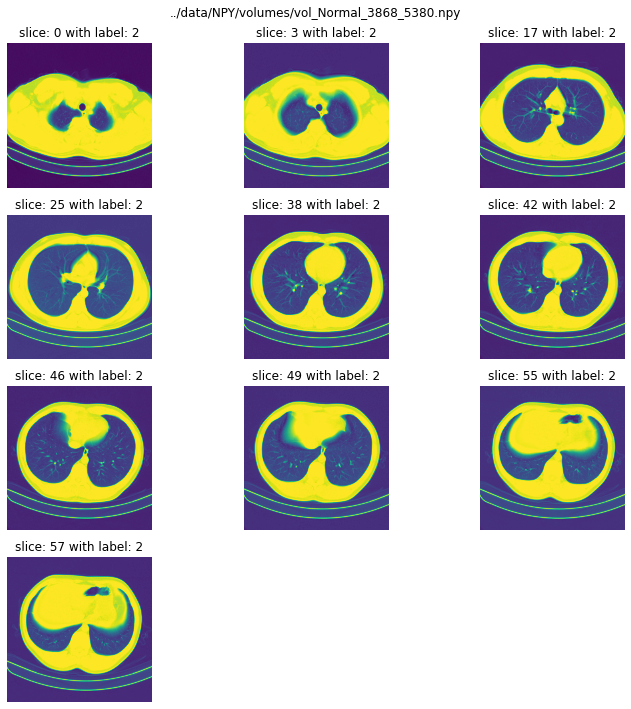

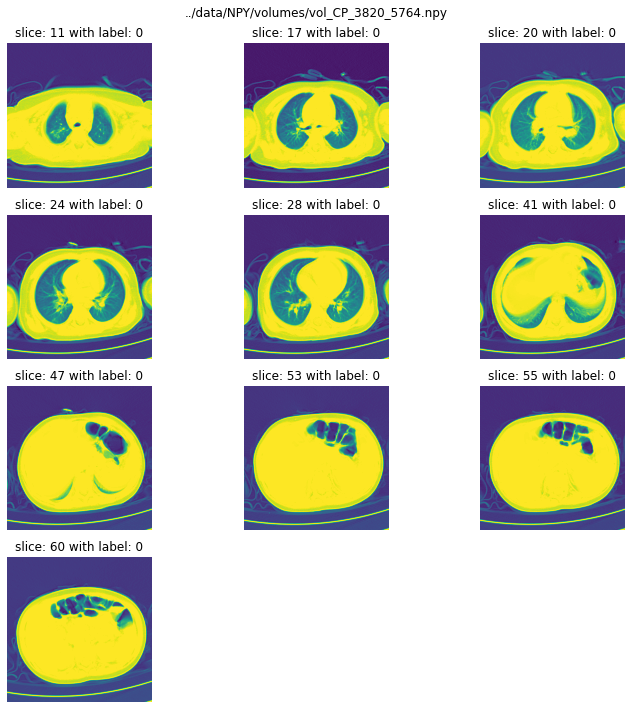

In [5]:
random_idx = random.sample(range(len(dataset)), 2)
n_slices = 10

for idx in random_idx:
    volume, label = dataset[idx]
    vis.plot_from_volume_tensor(volume,
                                label,
                                n_samples=n_slices,
                                n_cols=3, 
                                title=dataset.files[idx])

### Now lets visualize a whole volume 

In [ ]:
../data/NPY/volumes/vol_CP_1784_3590.npy

In [12]:
random_idx = random.randint(0, len(dataset))
print(dataset.files[random_idx])
volume, label = dataset[random_idx]
print(volume.shape)
vis.plot_volume(volume)

../data/NPY/volumes/vol_NCP_47_1227.npy
torch.Size([64, 512, 512])


Output()